# Algotytm przecinania się odcinków na płaszczyźnie

In [3]:
%pip install sortedcontainers


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from sortedcontainers import SortedSet, SortedList

# Przydatne funkcje 

In [7]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

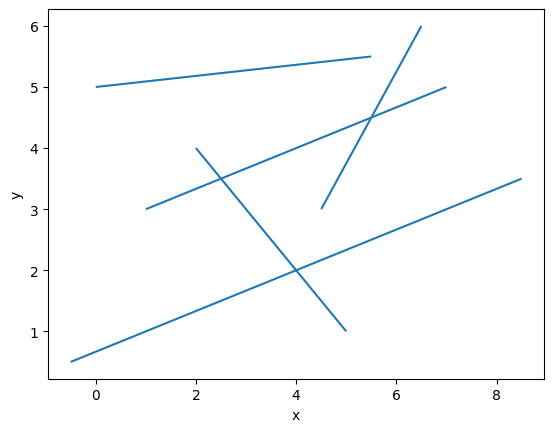

In [8]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

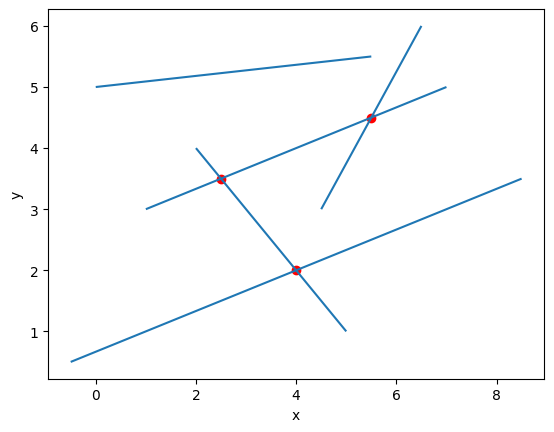

In [9]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [10]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    res = []
    x_coords = []
    cnt = 0
    while cnt < n:
        curr_x1 = np.random.uniform(0, max_x)
        curr_y1 = np.random.uniform(0, max_y)
        curr_x2 = np.random.uniform(0, max_x)
        curr_y2 = np.random.uniform(0, max_y)

        if curr_x1 == curr_x2:
            continue

        if curr_x1 in x_coords or curr_x2 in x_coords:
            continue
        
        res.append(((curr_x1, curr_y1), (curr_x2, curr_y2)))
        x_coords.append(curr_x1)
        x_coords.append(curr_x2)
        cnt += 1

    return res


In [11]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 1.719s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [12]:
# section = ...
segments_a = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

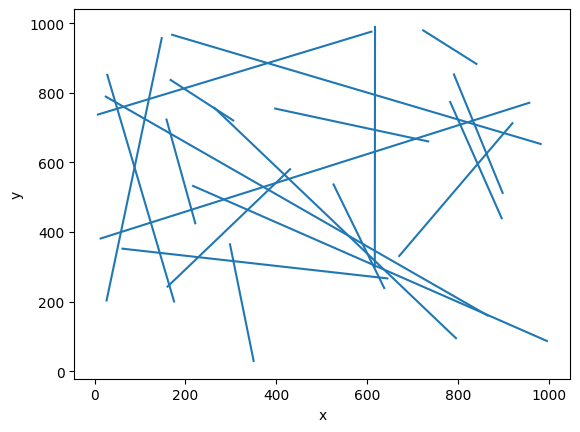

In [13]:
# visualize = ...
vis = Visualizer()
vis.add_line_segment(segments_a)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [70]:
# def add_sections(sections):
%matplotlib tk
from matplotlib.backend_bases import MouseButton
#def add_sections(sections):
click = []

fig, ax = plt.subplots()
ax.set_title('Line segments')
plt.xlim(0, 10)
plt.ylim(0, 10)

def on_click(event):
    if event.button is MouseButton.LEFT:
        x = event.xdata
        y = event.ydata
        click.append((x, y))
        ax.plot(*click[-1], marker='.', color='blue')
        if len(click)>1 and len(click)%2==0:
            ax.plot(*zip(click[-1], click[-2]), color='blue')
        plt.show()

plt.connect('button_press_event', on_click)
plt.show(block=True)
generated = []
for i in range(0, len(click), 2):
    generated.append(((click[i][0], click[i][1]), (click[i+1][0], click[i+1][1])))
for i in range(len(click)):
    if i%2==0:
        print("x1: ", click[i][0], " y1: ", click[i][1], end='   ')
    else:
        print("x2: ", click[i][0], " y2: ", click[i][1])
print(generated)
%matplotlib inline

x1:  5.786290322580646  y1:  7.337662337662339   x2:  1.9153225806451615  y2:  3.928571428571429
x1:  2.7822580645161294  y1:  7.472943722943723   x2:  6.754032258064516  y2:  5.443722943722944
x1:  1.9556451612903225  y1:  5.66017316017316   x2:  5.362903225806452  y2:  3.54978354978355
x1:  7.278225806451612  y1:  3.7932900432900434   x2:  9.495967741935484  y2:  3.008658008658009
x1:  9.213709677419354  y1:  4.226190476190476   x2:  8.104838709677418  y2:  2.900432900432901
x1:  8.14516129032258  y1:  5.335497835497836   x2:  9.032258064516128  y2:  5.254329004329005
x1:  0.6048387096774195  y1:  1.195887445887446   x2:  8.870967741935484  y2:  1.0335497835497836
[((np.float64(5.786290322580646), np.float64(7.337662337662339)), (np.float64(1.9153225806451615), np.float64(3.928571428571429))), ((np.float64(2.7822580645161294), np.float64(7.472943722943723)), (np.float64(6.754032258064516), np.float64(5.443722943722944))), ((np.float64(1.9556451612903225), np.float64(5.66017316017316)

Uzupełnij funkcję ```is_intersection```

In [16]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    n = len(sections)

    def intersects(seg1, seg2):
        (x1, y1), (x2, y2) = seg1
        (x3, y3), (x4, y4) = seg2

        def cross_product(p1, p2, p3):
            return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

        d1 = cross_product((x1, y1), (x2, y2), (x3, y3))
        d2 = cross_product((x1, y1), (x2, y2), (x4, y4))
        if d1 * d2 > 0: 
            return False

        d3 = cross_product((x3, y3), (x4, y4), (x1, y1))
        d4 = cross_product((x3, y3), (x4, y4), (x2, y2))
        if d3 * d4 > 0: 
            return False

        if d1 == 0 and d2 == 0 and d3 == 0 and d4 == 0:
            return False

        return True
    
    for i in range(n):
        for j in range(i + 1, n):
            if intersects(sections[i], sections[j]):
                return True
    
    return False




In [17]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    

Uzupełnij funkcję ```find_intersections```

In [ ]:
class Point:
    def __init__(self, x, y,event):
        self.x = x
        self.y = y
        self.event = event #0 start, 1 end

    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x
    
    def __hash__(self):
        return hash((self.x, self.y))

class Line:
    def __init__(self, A, B, id=None):
        self.A = A
        self.B = B
        self.a = (A[1]-B[1])/(A[0]-B[0]) #y = ax+b
        self.b = A[1]-self.a*A[0]
        self.x = A[0] #aktualny rozwazany x
        self.id = id

    def update_x(x):
        Line.x = x
    
    def __eq__(self, other):
        return self.A == other.A and self.B == other.B
    
    def __gt__(self, other):
        return Line.x*self.a+self.b > Line.x*other.a+other.b
    
    def __hash__(self):
        return hash((self.A, self.B))


1
2
2.5
4
5
[((2.5, 2.5), 0, 1)]
0.6048387096774195
1.9153225806451615
1.9556451612903225
2.7822580645161294
5.362903225806452
5.786290322580646
4.7806006257186135
6.754032258064516
7.278225806451612
8.104838709677418
8.14516129032258
8.870967741935484
9.032258064516128
9.213709677419354
8.492348234696468
9.495967741935484
[((np.float64(4.7806006257186135), np.float64(6.451969706903163)), 0, 1), ((np.float64(8.492348234696468), np.float64(3.3637362994914892)), 3, 4)]


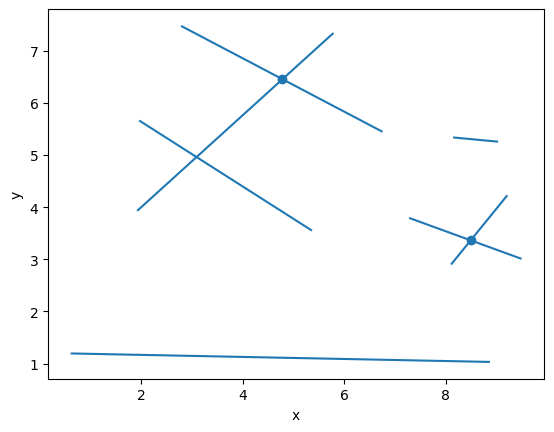

In [74]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def intersects(line1, line2):

        def cross_product(p1, p2, p3):
            return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

        d1 = cross_product(line1.A, line1.B, line2.A)
        d2 = cross_product(line1.A, line1.B, line2.B)
        if d1 * d2 > 0: 
            return False

        d3 = cross_product(line2.A, line2.B, line1.A)
        d4 = cross_product(line2.A, line2.B, line1.B)
        if d3 * d4 > 0: 
            return False

        if d1 == 0 and d2 == 0 and d3 == 0 and d4 == 0:
            return False

        return True
    
    def intersect_point(line1, line2):
        x_res = (line2.b - line1.b)/(line1.a - line2.a)
        y_res = line1.a * x_res + line1.b
        return Point(x_res, y_res, 2)
    
    def find_index(arr, elem):
        low, high = 0, len(arr)
        while low < high:
            mid = (low + high) // 2
            if arr[mid] < elem: 
                low = mid + 1
            else:
                high = mid
        return low

    T = SortedSet() #struktura stanu
    Q = SortedList(key=lambda x: x[0]) #struktura zdarzen

    for i in range(len(sections)):
        A = Point(sections[i][0][0], sections[i][0][1], 0)
        B = Point(sections[i][1][0], sections[i][1][1], 1)
        line = Line(sections[i][0], sections[i][1], i)
        Q.add((A, line))
        Q.add((B, line))
    
    #(A, ((a,b),(c,d)), 2) - przeciecie

    res = []
    res_ids = set()

    while Q:

        point, seg = Q.pop(0)
        print(point.x)
        if point.event == 0:
            Line.update_x(point.x)
            T.add(seg)
            index = T.bisect_left(seg)
            if index > 0:
                neighbor = T[index - 1]
                if intersects(neighbor, seg):
                    Q.add((intersect_point(neighbor, seg), (neighbor, seg)))
            
            if index < len(T) - 1:
                neighbor = T[index + 1]
                if intersects(neighbor, seg):
                    Q.add((intersect_point(neighbor, seg), (neighbor, seg)))

        elif point.event == 1:
            Line.update_x(point.x)
            index = T.bisect_left(seg)
            if 0 < index < len(T) - 1:
                nei_1, nei_2 = T[index - 1], T[index + 1]
                if intersects(nei_1, nei_2):
                    Q.add((intersect_point(nei_1, nei_2), (nei_1, nei_2)))
            T.discard(seg)

        elif point.event == 2:
            if (min(seg[0].id, seg[1].id), max(seg[0].id, seg[1].id)) in res_ids:
                continue

            res.append(((point.x, point.y), min(seg[0].id, seg[1].id), max(seg[0].id, seg[1].id)))
            res_ids.add((min(seg[0].id, seg[1].id), max(seg[0].id, seg[1].id)))

            T.discard(seg[0])
            T.discard(seg[1])
            Line.update_x(point.x + 1e-10)
            T.add(seg[0])
            T.add(seg[1])

            nei_up = T.bisect_left(seg[0]) + 1
            nei_down = T.bisect_left(seg[1]) - 1

            if nei_down >= 0:
                if intersects(seg[0], T[nei_down]):
                    Q.add((intersect_point(seg[0], T[nei_down]), (seg[0], T[nei_down])))

            if nei_up < len(T):
                  if intersects(seg[1], T[nei_up]):
                    Q.add((intersect_point(seg[1], T[nei_up]), (seg[1], T[nei_down])))
    
    return res

test = [((1,1),(5,5)),((2,3),(4,1))]
print(find_intersections(test))

vis = Visualizer()
testres = find_intersections(generated)
print(testres)
tovis = []
for point, a, b in testres:
    tovis.append(point)
vis.add_line_segment(generated)
vis.add_point(tovis)

vis.show()


    



In [64]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: 

ValueError: <__main__.Line object at 0x0000025819452310> not in list

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.